In [7]:
import tensorflow as tf
from keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns

## For ann model

In [23]:
(x_train, y_train), (x_test,y_test) = fashion.load_data()

In [26]:
x_train = x_train.reshape(len(train_i),28,28,1)
x_test = x_test.reshape(len(test_i),28,28,1)

In [25]:
x_train = x_train/255
x_test = x_test/255

In [29]:
amodel=models.Sequential([
                     layers.Flatten(input_shape=(28,28,1)),    
                     layers.Dense(300, activation='relu'),
                     layers.Dense(100, activation='relu'),
                     layers.Dense(10, activation='softmax')    
])


In [31]:
amodel.compile(optimizer ='SGD',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

In [32]:
amodel.fit(x_train, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9972 - accuracy: 0.6861
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5007 - accuracy: 0.8282
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4465 - accuracy: 0.8441
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4212 - accuracy: 0.8551
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3899 - accuracy: 0.8640
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3779 - accuracy: 0.8656
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3641 - accuracy: 0.8707
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3517 - accuracy: 0.8769
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3397 - accuracy: 0.8770
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.330

In [33]:
y_pred = amodel.predict(x_test)

In [34]:
y_pred_refined=[np.argmax(i) for i in y_pred]

In [43]:
print(accuracy_score(y_pred_refined, y_test))
print(classification_report(y_pred_refined, y_test))

0.8687
              precision    recall  f1-score   support

           0       0.84      0.81      0.82      1042
           1       0.97      0.98      0.97       991
           2       0.74      0.82      0.78       899
           3       0.86      0.88      0.87       982
           4       0.84      0.75      0.79      1132
           5       0.94      0.96      0.95       983
           6       0.64      0.70      0.67       902
           7       0.96      0.89      0.93      1077
           8       0.97      0.93      0.95      1045
           9       0.92      0.97      0.95       947

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



<AxesSubplot:>

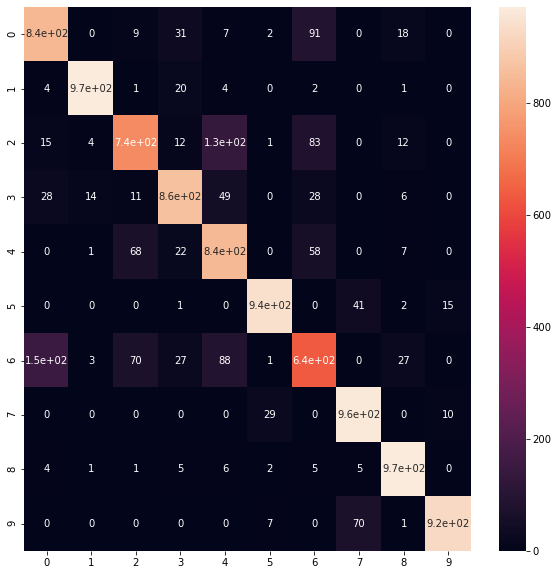

In [37]:
plt.figure(figsize = (10,10))
sns.heatmap(tf.math.confusion_matrix(labels=y_test,predictions=y_pred_refined), annot = True)

## CNN Model

In [44]:
fashion = datasets.fashion_mnist
(train_i, train_l), (test_i, test_l) = fashion.load_data()

In [45]:
train_i = train_i.reshape(len(train_i),28,28,1)
test_i = test_i.reshape(len(test_i),28,28,1)

In [46]:
train_i = train_i/255
test_i = test_i/255

In [51]:
cmodel = models.Sequential()
cmodel.add(layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu' , input_shape = (28,28,1) ))
cmodel.add(layers.MaxPool2D())


cmodel.add(layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'))
cmodel.add(layers.MaxPool2D())

cmodel.add(layers.Flatten())

cmodel.add(layers.Dense(64,activation='relu'))
cmodel.add(layers.Dense(10,activation='softmax'))

In [52]:
cmodel.compile(optimizer='Adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

In [53]:
cmodel.fit(train_i, train_l, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 28s 14ms/step - loss: 0.6699 - accuracy: 0.7641
Epoch 2/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.3321 - accuracy: 0.8812
Epoch 3/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.2840 - accuracy: 0.8952
Epoch 4/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.2539 - accuracy: 0.90700s - l
Epoch 5/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.2275 - accuracy: 0.9139
Epoch 6/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.2105 - accuracy: 0.9208
Epoch 7/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1914 - accuracy: 0.9291
Epoch 8/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.1798 - accuracy: 0.9335
Epoch 9/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.1709 - accuracy: 0.93680s - l
Epoch 10/10
1875/1875 [=============================

In [56]:
i_pred = cmodel.predict(test_i)

In [57]:
i_pred_refined=[np.argmax(i) for i in i_pred]

In [60]:
print(accuracy_score(i_pred_refined, test_l))
print(classification_report(i_pred_refined, test_l))

0.909
              precision    recall  f1-score   support

           0       0.89      0.84      0.86      1067
           1       0.97      1.00      0.98       975
           2       0.88      0.83      0.86      1059
           3       0.91      0.93      0.92       981
           4       0.81      0.90      0.86       906
           5       0.98      0.98      0.98       998
           6       0.74      0.73      0.74      1015
           7       0.98      0.93      0.96      1048
           8       0.97      0.98      0.98       990
           9       0.94      0.98      0.96       961

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

